# Implementing Divisive Hierarchical Clustering Algorithm 

In this implementation, I have generated a 2D dimensional data set. The data is generated in such a way that it forms four clusters. Then Divisive Hierarchical Clustering is run on the data to indentify the four clusters. 

##### This is based on assignment in the Machine Learning specialization by University of Washington on Coursera

In [1]:
import numpy as np 
import pandas as pd
import math 
import operator
import random
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt                                # plotting
from scipy.stats import multivariate_normal                    # multivariate Gaussian distribution
import copy                                                    # deep copies

# image handling library
from PIL import Image
from io import BytesIO

In [132]:
# Generating synthetic data
def generate_MoG_data(num_data, means, covariances, weights):
    num_clusters = len(weights)
    data = []
    for i in range(num_data):
        k = np.random.choice(len(weights), 1, p=weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])
        data.append(x)
    return data


init_means = [
    [1, 6.2], # mean of cluster 1
    [-1, 3.2], # mean of cluster 2
    [6.2, 1],
    [3.2,-1] # mean of cluster 3
]
init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.8, .2], [.1, .5]], # covariance of cluster 2
    [[.5, 0.], [0, .5]],
    [[.8, .2], [.1, .5]] # covariance of cluster 3
]
init_weights = [1/4., 1/4., 1/4.,1/4.]  # weights of each cluster

# Generate data
np.random.seed(88)
data = generate_MoG_data(200, init_means, init_covariances, init_weights)

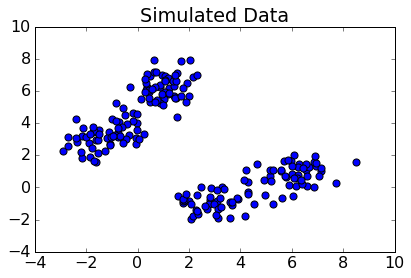

In [133]:
plt.figure()
d = np.vstack(data)
plt.scatter(d[:,0], d[:,1],s=50)
plt.rcParams.update({'font.size':16})
plt.tight_layout()
plt.title('Simulated Data')
plt.show()

In [181]:
def kmeans(data, cent_num, maxIter):
    d = np.vstack(data)
    centroid=np.zeros([cent_num,2])
    
    #Following is an alternative initialization, which is random in nature
    
    #for i in range(0,cent_num):
    #    centroid[i][0]=random.randrange(int(min(d[:,0])),int(max(d[:,0])))
    #    centroid[i][1]=random.randrange(int(min(d[:,1])),int(max(d[:,1])))
    
    chosen=np.random.choice(len(data), cent_num, replace=False)
    centroid=[data[x] for x in chosen]
    centroid=np.vstack(centroid)

    assign=np.zeros([len(data),1])  

    for a in range(0,maxIter):
        for i in range(0,len(data)):
            dist=[-1]*cent_num
            for k in range(0,cent_num):
                dist[k]=math.sqrt(math.pow((data[i][0]-centroid[k][0]),2)+math.pow((data[i][1]-centroid[k][1]),2))
            dist_min=dist[0]
            cent=0
            for k in range(1,cent_num):
                if dist[k]<=dist_min:
                    dist_min=dist[k]
                    cent=k
            assign[i]=cent+1

        mean=[[0,0],[0,0]]
        count=[0,0]        

        for k in range(0,len(data)):
            for b in range(0,cent_num):
                if int(assign[k])==b+1:
                    mean[b][0]+=data[k][0]
                    mean[b][1]+=data[k][1]
                    count[b]+=1

        for c in range(0,cent_num): 
            centroid[c][0]=mean[c][0]/count[c]
            centroid[c][1]=mean[c][1]/count[c]
    
    data=np.append(data, assign, axis=1)
    return data, centroid;

In [188]:
def CreateTree(node, data):
    data_length=len(data)
    number_of_clusters=2
    
    if data_length<=25:
        return [] 

    assign_node,centroid=kmeans(data,number_of_clusters,8)
    
    left_child_data=assign_node[:,[0,1]][assign_node[:,2]==1.]
    right_child_data=assign_node[:,[0,1]][assign_node[:,2]==2.]
    
    node=[[assign_node,centroid],[],[]]  
    
    node[1]=CreateTree(node[1],left_child_data)
    node[2]=CreateTree(node[2],right_child_data)
    
    return node

In [210]:
def DFS(node,node_num):            # DFS here stands for Depth First Search
    if node==[]:
        return 
    
    print("Number of points in Cluster 1 at node level ",str(node_num),":", len(node[0][0][node[0][0][:,2]==1.]))
    print("Number of points in Cluster 2 at node level ",str(node_num),":", len(node[0][0][node[0][0][:,2]==2,]))
    
    plt.scatter(node[0][0][:,0], node[0][0][:,1],c=node[0][0][:,2],s=50)
    plt.scatter(node[0][1][:,0], node[0][1][:,1],marker="x",s=250)
    plt.xlim(-4, 10)
    plt.ylim(-4, 10)
    plt.title("Node Level: "+ str(node_num))
    plt.show()
    
    DFS(node[1],node_num+1)
    DFS(node[2],node_num+1)    
    return  

In [211]:
root=[]
root=CreateTree(root, data)

In the following demonstration, data sets are recursively partitioned into two clusters. Stopping criteria for the partitioning is if the number of points is less than or equal to 25, which means that if number of points is a cluster is less than or equal to 25 then no further partitioning of that cluster will take place. 

In the figures, a node level is the node depth from root node in the binary search tree.

Number of points in Cluster 1 at node level  0 : 111
Number of points in Cluster 2 at node level  0 : 89


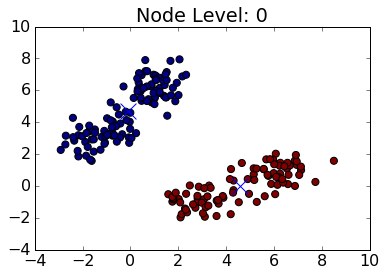

Number of points in Cluster 1 at node level  1 : 57
Number of points in Cluster 2 at node level  1 : 54


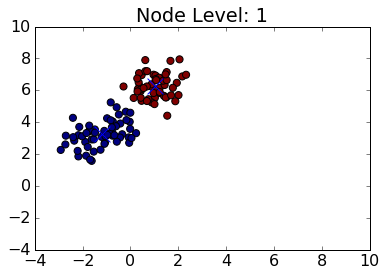

Number of points in Cluster 1 at node level  2 : 28
Number of points in Cluster 2 at node level  2 : 29


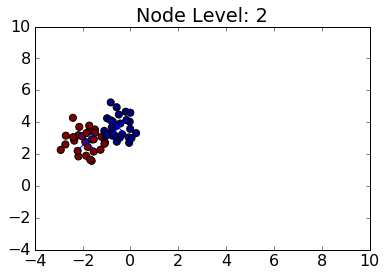

Number of points in Cluster 1 at node level  3 : 11
Number of points in Cluster 2 at node level  3 : 17


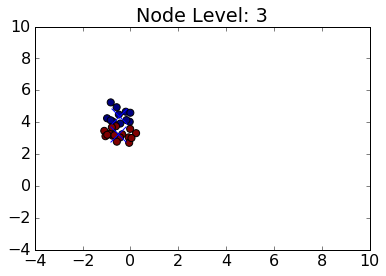

Number of points in Cluster 1 at node level  3 : 16
Number of points in Cluster 2 at node level  3 : 13


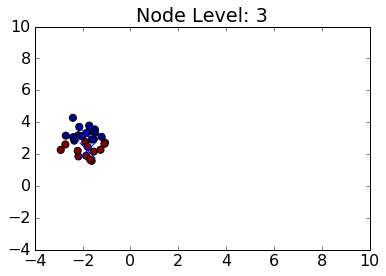

Number of points in Cluster 1 at node level  2 : 24
Number of points in Cluster 2 at node level  2 : 30


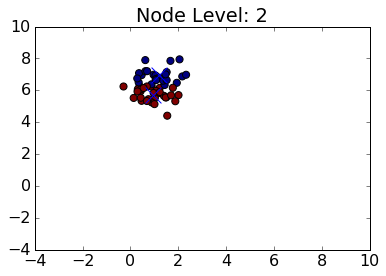

Number of points in Cluster 1 at node level  3 : 14
Number of points in Cluster 2 at node level  3 : 16


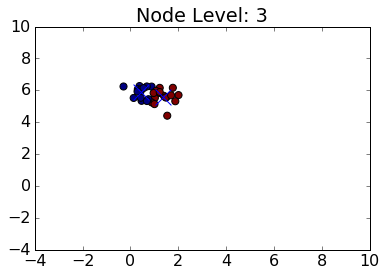

Number of points in Cluster 1 at node level  1 : 47
Number of points in Cluster 2 at node level  1 : 42


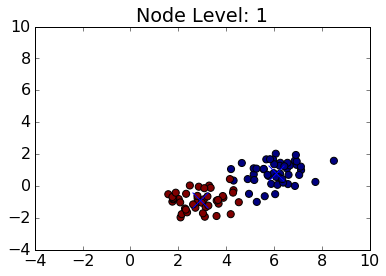

Number of points in Cluster 1 at node level  2 : 29
Number of points in Cluster 2 at node level  2 : 18


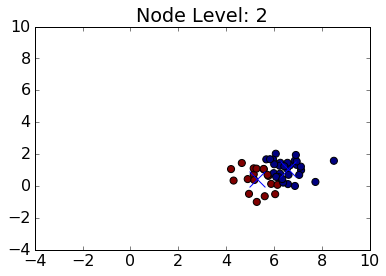

Number of points in Cluster 1 at node level  3 : 16
Number of points in Cluster 2 at node level  3 : 13


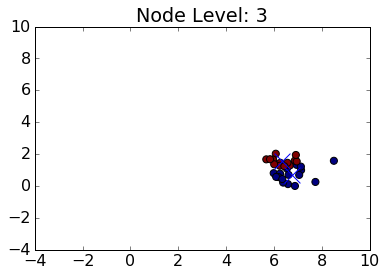

Number of points in Cluster 1 at node level  2 : 19
Number of points in Cluster 2 at node level  2 : 23


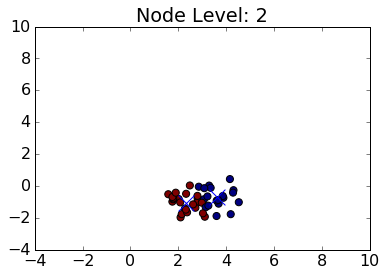

In [213]:
DFS(root,0)